In [1]:
%matplotlib inline
import pylab as plt
import cPickle
import numpy as np
import glob
import niche_transform
reload(niche_transform)

from niche_transform import transform,transform2

f1 = glob.glob("../Downloads/f0/*.pkl")
f2 = glob.glob("../Downloads/f1/*.pkl")
f3 = glob.glob("../Downloads/f2/*.pkl")

#files = glob.glob("fool10-0.pkl")


In [2]:
print len(f1),len(f2),len(f3)

10 10 10


In [3]:
def read_results(files):
 results=[]
 avg=[]
 for f in files:
    elite_score,elite_map,evals,history,elite_extra,plots = cPickle.load(open(f))
    if elite_score.shape[0]>1000:
      print "transform"
      elite_score = transform(elite_score)
    result={'es':elite_score,'em':elite_map,'evals':evals,'history':history,'ee':elite_extra,'plots':plots}
    
    print elite_score.shape
    print elite_score.mean(),evals
    results.append(result)
 return results

r0 = read_results(glob.glob("../Downloads/f0/*.pkl"))
r1 = read_results(glob.glob("../Downloads/f1/*.pkl"))
r2 = read_results(glob.glob("../Downloads/f2/*.pkl"))

(1000,)
0.0433592387935 249999
(1000,)
0.0446526101785 249999
(1000,)
0.0374755111721 249999
(1000,)
0.0435453000139 249999
(1000,)
0.0360829345269 249999
(1000,)
0.0495791196066 249999
(1000,)
0.0366248907905 249999
(1000,)
0.046091294202 249999
(1000,)
0.0517402993749 249999
(1000,)
0.0378611727265 249999
transform
(1000,)
0.0483678508191 249999
transform
(1000,)
0.0642196624211 249999
transform
(1000,)
0.0523998891905 249999
transform
(1000,)
0.0512617744541 249999
transform
(1000,)
0.0504125201403 249999
transform
(1000,)
0.0536463076679 249999
transform
(1000,)
0.0644317187318 249999
transform
(1000,)
0.0576407537835 249999
transform
(1000,)
0.0524232982412 249999
transform
(1000,)
0.0565799266623 249999
(1000,)
0.0344176887275 249999
(1000,)
0.0288252932205 249999
(1000,)
0.0289935430595 249999
(1000,)
0.0413714290884 249999
(1000,)
0.0260978772501 249999
(1000,)
0.0273326445135 249999
(1000,)
0.0337274500256 249999
(1000,)
0.0311953408544 249999
(1000,)
0.0282008035822 249999
(1

In [23]:
avg_func = lambda x:np.mean(x,1)

"""
def mult(x):
    return reduce(lambda x,y:x*y,x)

avg_func = mult
"""

def create_series(plots):
 y=[]
 for plot in plots:
    if plot.shape[0]>1000:
        plot=transform2(plot)
    y.append(avg_func(plot).mean())
 return y

def create_concat_series(res):
 y=[]

 for r in res:
    y.append(create_series(r))

 y = [s for s in y if len(s)>=25]
 
 return np.array(y)

plots1 = [r['plots'] for r in r0]
plots2 = [r['plots'] for r in r1]
plots3 = [r['plots'] for r in r2]


series1,series2,series3 = [create_concat_series(p) for p in [plots1,plots2,plots3]]
    
end_dist1 = series1[:,-1]
end_dist2 = series2[:,-1]
end_dist3 = series3[:,-1]

import scipy.stats

correction = 3
#print scipy.stats.ttest_ind(end_dist1,end_dist2)
print scipy.stats.ttest_ind(end_dist1,end_dist2)[1]*correction
print scipy.stats.ttest_ind(end_dist1,end_dist3)[1]*correction
print scipy.stats.ttest_ind(end_dist2,end_dist3)[1]*correction




0.000716696903015
0.0158764300302
8.07449965255e-07


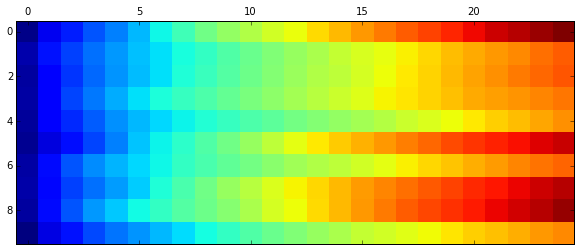

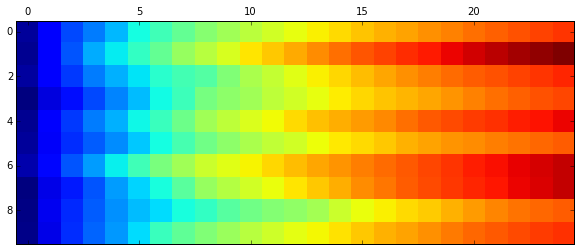

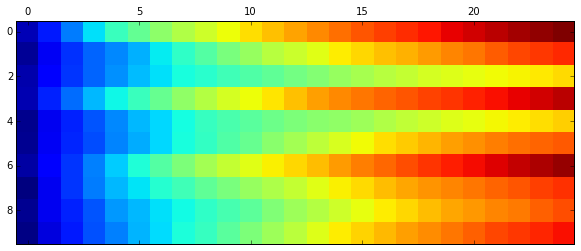

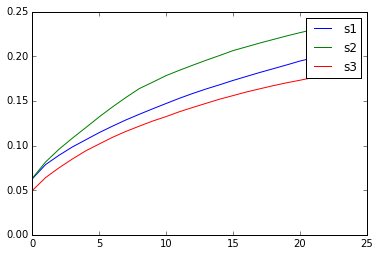

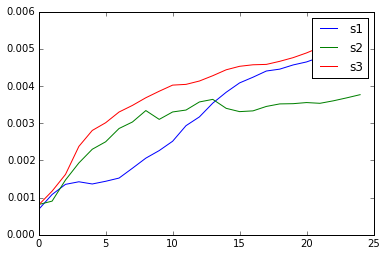

In [25]:
plt.matshow(series1)
plt.matshow(series2)
plt.matshow(series3)

import math
cor = math.sqrt(10)

series1_std = series1.std(axis=0) / cor
series2_std = series2.std(axis=0) / cor
series3_std = series3.std(axis=0) / cor

series1 = series1.mean(axis=0)
series2 = series2.mean(axis=0)
series3 = series3.mean(axis=0)


plt.figure()

plt.plot(series1,label='s1')
plt.plot(series2,label='s2')
plt.plot(series3,label='s3')
plt.legend()

plt.figure()
plt.plot(series1_std,label='s1')
plt.plot(series2_std,label='s2')
plt.plot(series3_std,label='s3')
plt.legend()

In [10]:
print series1.shape

(10,)


In [26]:
import csv
with open('prelim_exp.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for r in range(len(series1)):
     s1x = s2x = s3x = (r+1)*10000.0
     s1y = series1[r]
     s2y = series2[r]
     s3y = series3[r]
     s1e = series1_std[r]
     s2e = series2_std[r]
     s3e = series3_std[r]

     spamwriter.writerow([s1x,s1y,s1e,s2x,s2y,s2e,s3x,s3y,s3e])
   